In [7]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# Function to fetch all planet data from SWAPI
def get_all_planet_data():
    all_planets_data = []

    for planet_id in range(1, 62):  # There are 60 planets in the SWAPI
        api_url = f'https://swapi.dev/api/planets/{planet_id}/'
        response = requests.get(api_url)

        if response.status_code == 200:
            planet_data = response.json()
            all_planets_data.append(planet_data)

    return all_planets_data

In [16]:
# Fetch all planet data
all_planets_data = get_all_planet_data()

# Create a DataFrame from the list of planet data
planets_df = pd.DataFrame(all_planets_data)

In [28]:
# Remove all planets with a diameter of '0' or 'unknown'
planets_df = planets_df[(planets_df['diameter'] != 0)]
planets_df = planets_df[planets_df['diameter'] != 'unknown']

In [18]:
# Remove columns after "population"
planets_df = planets_df.loc[:, :'population']

In [19]:
# Convert diameter to numeric
planets_df['diameter'] = pd.to_numeric(planets_df['diameter'])

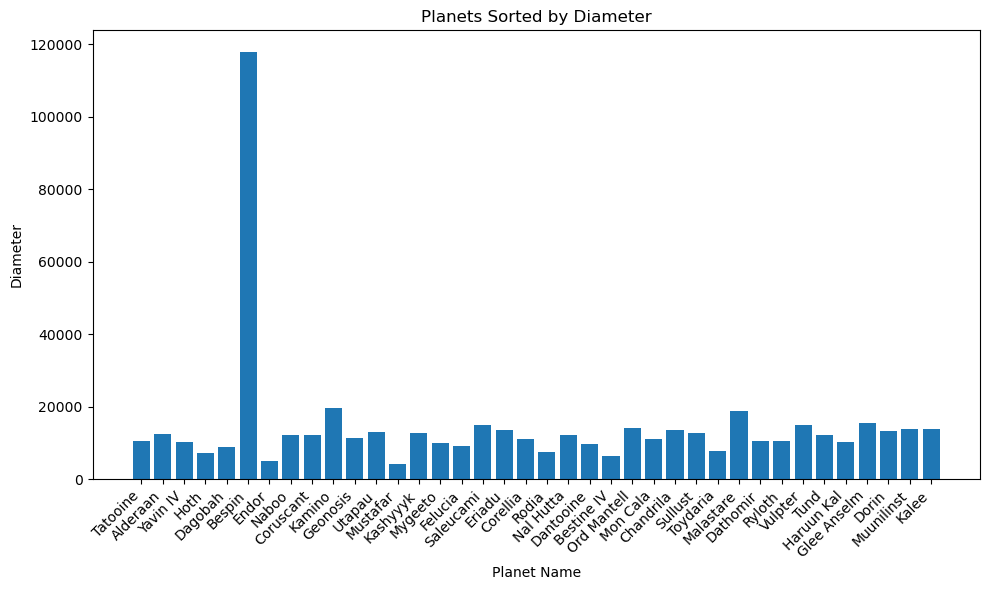

In [36]:
# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(planets_df['name'], planets_df['diameter'])
plt.xticks(rotation=45, ha='right')
plt.title('Planets Sorted by Diameter')
plt.xlabel('Planet Name')
plt.ylabel('Diameter')
plt.tight_layout()
plt.show()

In [29]:
# Reset the index to ensure correct alignment with y-axis ticks
planets_df.reset_index(drop=True, inplace=True)

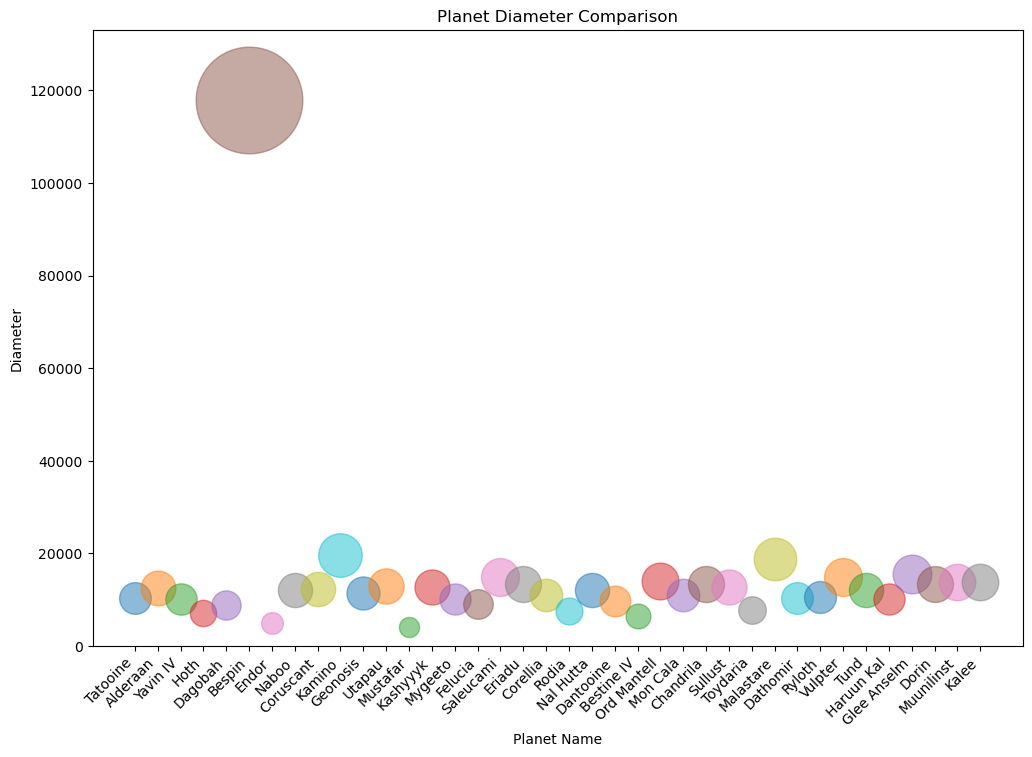

In [38]:
# Set up the plot
plt.figure(figsize=(12, 8))

# Plot circles for each planet based on diameter 
for index, planet in planets_df.iterrows():
    plt.scatter(
        x=index,  
        y=planet['diameter'],  
        s=planet['diameter'] / 20,  # Adjust the scaling factor as needed
        alpha=0.5,
        label=planet['name']
    )

# Set axis labels and title
plt.title('Planet Diameter Comparison')
plt.xlabel('Planet Name')
plt.ylabel('Diameter')

# Set x-axis ticks and labels
plt.xticks(range(len(planets_df)), planets_df['name'], rotation=45, ha='right')

# Set the y-axis limit dynamically
plt.ylim(0, planets_df['diameter'].max() + 15000)

# Show the plot
plt.show()

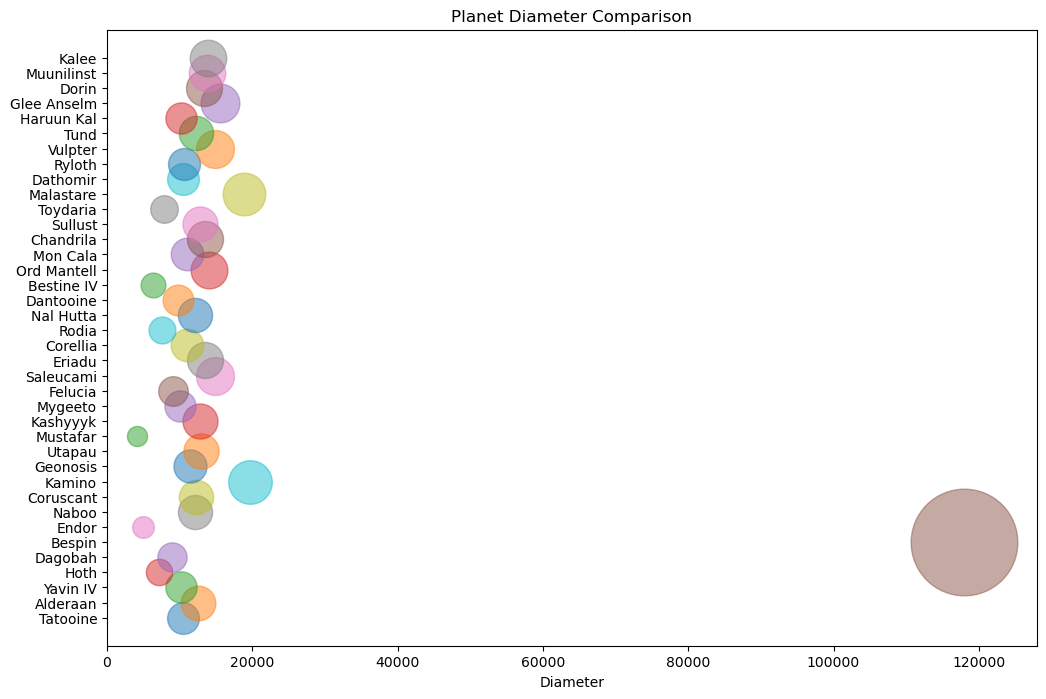

In [35]:
# Plot circles for each planet based on diameter
plt.figure(figsize=(12, 8))
for index, planet in planets_df.iterrows():
    plt.scatter(
        x=planet['diameter'],
        y=index,
        s=planet['diameter'] / 20,  # Adjust the scaling factor as needed
        alpha=0.5,
        label=planet['name']
    )

plt.title('Planet Diameter Comparison')
plt.xlabel('Diameter')
plt.yticks(range(len(planets_df)), planets_df['name'])
plt.xlim(0, planets_df['diameter'].max() + 10000)  # Set the x-axis limit dynamically
plt.show()


In [24]:
planets_df

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population
0,Tatooine,23,304,10465,arid,1 standard,desert,1,200000
1,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000
2,Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8,1000
3,Hoth,23,549,7200,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100,unknown
4,Dagobah,23,341,8900,murky,N/A,"swamp, jungles",8,unknown
5,Bespin,12,5110,118000,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0,6000000
6,Endor,18,402,4900,temperate,0.85 standard,"forests, mountains, lakes",8,30000000
7,Naboo,26,312,12120,temperate,1 standard,"grassy hills, swamps, forests, mountains",12,4500000000
8,Coruscant,24,368,12240,temperate,1 standard,"cityscape, mountains",unknown,1000000000000
9,Kamino,27,463,19720,temperate,1 standard,ocean,100,1000000000
